In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

%matplotlib inline
np.set_printoptions(precision=5, suppress=True)

In [2]:
aws = pd.read_csv('aws/aws.csv', sep=',')
aws['cloud'] = 'aws'
for k in aws.keys():
    if aws[k].dtype == "object":
        aws[k]=aws[k].astype("category")

In [46]:
aws.dtypes

name                category
type                category
generation          category
line                category
workload_id         category
arch_id             category
hypervisor_id       category
hypervisor_model    category
share                  int64
cores                  int64
ram                  float64
cpu_id              category
cpu_codename        category
cpu_Ghz              float64
cpu_turboGhz         float64
cpu_turboMaxGhz      float64
cpu_numericId          int64
gpu_id              category
gpu_cores              int64
gpu_ram                int64
gpu_tensors            int64
gpu_numericId          int64
fpga_id             category
fpga_ram               int64
fpga_elements        float64
fpga_dsp               int64
fpga_numericId         int64
net_id              category
net_model           category
netMbpsSla          category
netMbps                int64
nets                   int64
ipsPerNet              int64
nbsMbsSla           category
nbsMbs        

In [5]:
aws.head()

,name,type,generation,line,workload_id,arch_id,hypervisor_id,hypervisor_model,share,cores,...,netMbps,nets,ipsPerNet,nbsMbsSla,nbsMbs,nbsInterface,lbs,lbsGb,lbsType,cloud
0,C4,c4.8xlarge,current,Compute Optimized,high performance front-end fleets,x86_64,hvm,XEN,100,36,...,10000,8,30,strict,4000,nvme,0,0,NaN,aws
1,C4,c4.8xlarge,current,Compute Optimized,web-servers,x86_64,hvm,XEN,100,36,...,10000,8,30,strict,4000,nvme,0,0,NaN,aws
2,C4,c4.8xlarge,current,Compute Optimized,batch processing,x86_64,hvm,XEN,100,36,...,10000,8,30,strict,4000,nvme,0,0,NaN,aws
3,C4,c4.8xlarge,current,Compute Optimized,distributed analytics,x86_64,hvm,XEN,100,36,...,10000,8,30,strict,4000,nvme,0,0,NaN,aws
4,C4,c4.8xlarge,current,Compute Optimized,high performance science applications,x86_64,hvm,XEN,100,36,...,10000,8,30,strict,4000,nvme,0,0,NaN,aws


In [18]:
aws.describe()

,share,cores,ram,cpu_Ghz,cpu_turboGhz,cpu_turboMaxGhz,cpu_numericId,gpu_cores,gpu_ram,gpu_tensors,...,fpga_elements,fpga_dsp,fpga_numericId,netMbps,nets,ipsPerNet,nbsMbs,lbs,lbsGb,ramPerCore
count,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,...,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000
mean,76.130199,19.851718,156.732821,2.456962,2.726582,2.887703,321.301989,413.858951,1.518987,31.247740,...,0.045208,122.965642,0.180832,8326.835443,5.721519,20.414105,3672.893309,1.101266,360.126582,5.630802
std,37.658110,26.511701,346.886989,0.226385,0.259199,0.341030,113.227138,1222.345738,4.265414,137.983139,...,0.333282,906.525700,1.333126,7857.571518,3.848044,13.956375,7540.168856,3.163802,705.701142,5.069885
min,5.000000,1.000000,0.500000,2.300000,2.400000,2.400000,120.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,10.000000,2.000000,2.000000,50.000000,0.000000,0.000000,0.500000
25%,30.000000,2.000000,8.000000,2.300000,2.500000,2.500000,320.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1000.000000,3.000000,10.000000,50.000000,0.000000,0.000000,2.000000
50%,100.000000,8.000000,32.000000,2.300000,2.700000,3.000000,340.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,10000.000000,4.000000,15.000000,1700.000000,0.000000,0.000000,4.000000
75%,100.000000,32.000000,192.000000,2.500000,3.000000,3.000000,420.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,10000.000000,8.000000,30.000000,4000.000000,1.000000,150.000000,7.625000
max,100.000000,128.000000,3904.000000,3.000000,3.200000,3.500000,420.000000,5120.000000,16.000000,640.000000,...,2.500000,6800.000000,10.000000,25000.000000,15.000000,50.000000,70000.000000,24.000000,2000.000000,30.500000


In [19]:
aws['ramPerCore'] = aws['ram']/aws['cores']
aws.describe(include=['category'])

,name,type,generation,line,workload_id,arch_id,hypervisor_id,hypervisor_model,cpu_id,cpu_codename,gpu_id,fpga_id,net_id,net_model,netMbpsSla,nbsMbsSla,nbsInterface,lbsType,cloud
count,1106,1106,1106,1106,1106,1106,1106,1106,1106,1106,132,20,1106,1106,1106,1106,1106,300,1106
unique,14,70,1,5,70,1,3,3,6,3,3,1,3,3,2,2,2,3,1
top,T2,t2.large,current,General Purpose,enterprise applications,x86_64,hvm,XEN,Intel-Xeon-E5-2686-v4-2.3,Broadwell,NVIDIA-Tesla-V100,Xilinx-Virtex-UltraScale-VU9P-FPGA,vif,XEN net,upto,strict,xen,nvme,aws
freq,320,48,1106,584,44,1106,950,950,464,464,54,20,725,725,824,702,572,156,1106


/usr/lib64/python3.6/site-packages/pandas/plotting/_misc.py:201: RuntimeWarning: invalid value encountered in true_divide
  y = (s * row_).sum(axis=0) / row.sum()


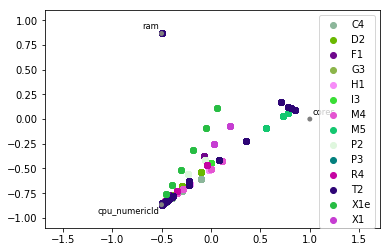

In [40]:
from pandas.plotting import radviz, parallel_coordinates
plt.figure()
radviz(aws[['cores','ram','cpu_numericId','name']],'name')


In [45]:
from bokeh.plotting import figure, show, output_file

ModuleNotFoundError: No module named 'bokeh'

In [6]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

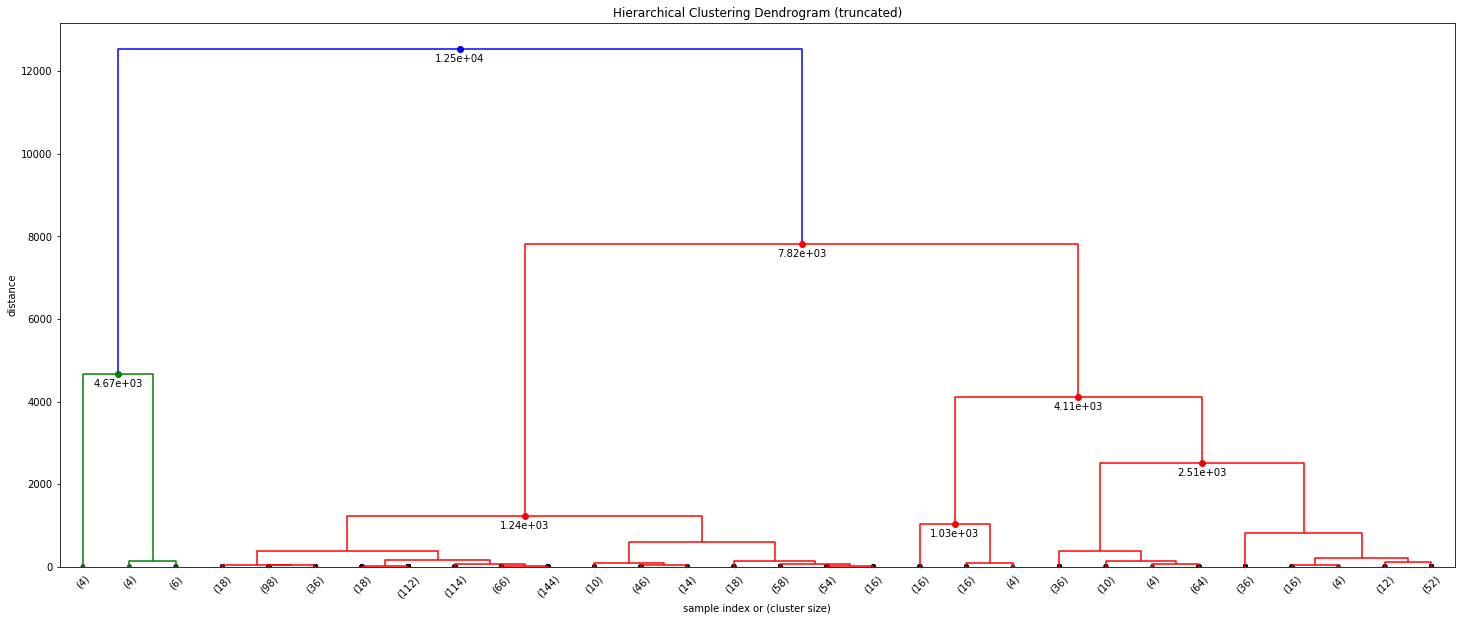

In [7]:
# generate the linkage matrix
X=aws[["cores","ram"]]
Z = linkage(X, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = fancy_dendrogram(Z,truncate_mode='lastp',show_contracted=True,annotate_above=1000)
plt.show()

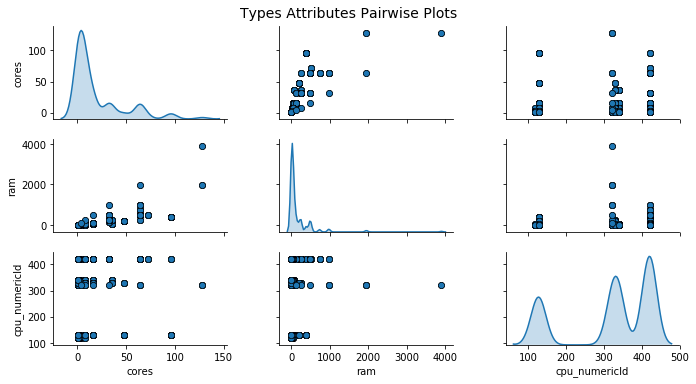

In [9]:
cols = ['cores', 'ram', 'cpu_numericId']
pp = sns.pairplot(aws[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Types Attributes Pairwise Plots', fontsize=14)

Text(0.5,0,'cpuPlatform')

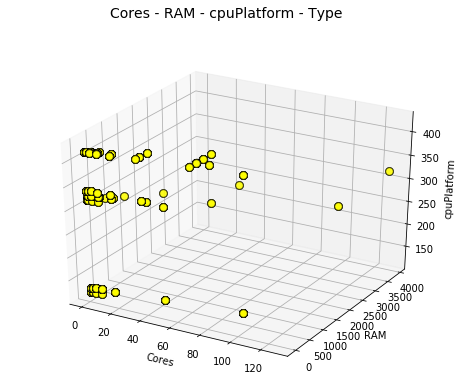

In [12]:
fig = plt.figure(figsize=(8, 6))
t = fig.suptitle('Cores - RAM - cpuPlatform - Type', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

xs = list(aws['cores'])
ys = list(aws['ram'])
zs = list(aws['cpu_numericId'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
colors = ['red' if wt == 'C5' else 'yellow' for wt in list(aws['name'])]

for data, color in zip(data_points, colors):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=60)

ax.set_xlabel('Cores')
ax.set_ylabel('RAM')
ax.set_zlabel('cpuPlatform')

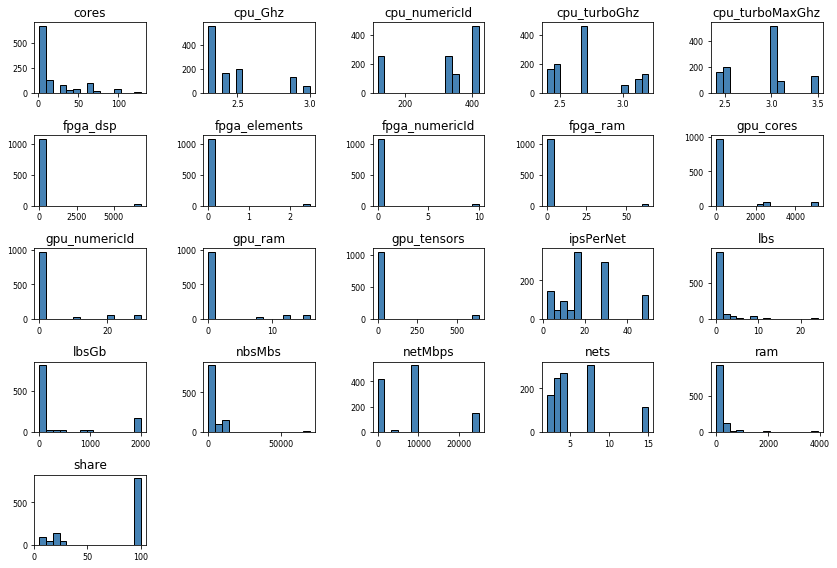

In [78]:
aws.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 2, 2))  

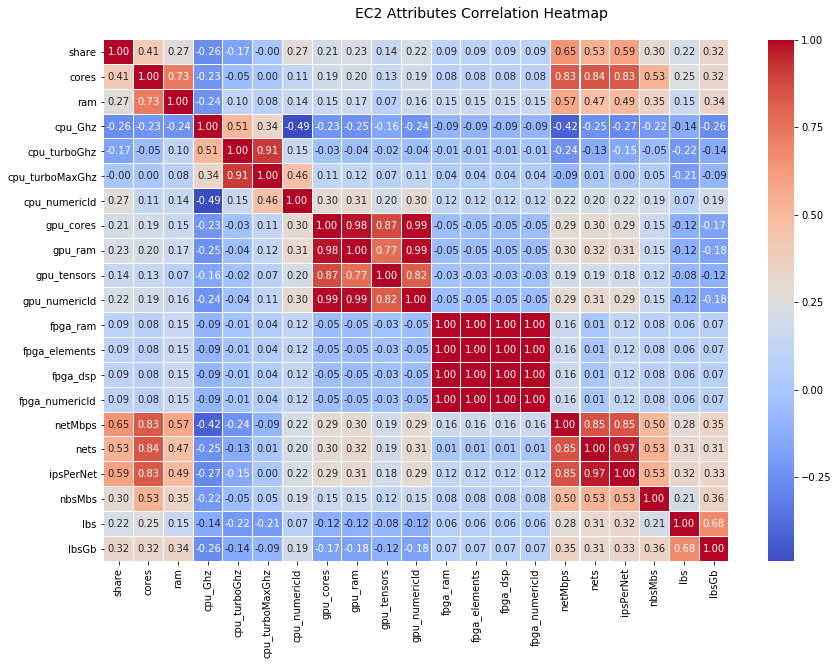

In [79]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(14, 9))
corr = aws.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('EC2 Attributes Correlation Heatmap', fontsize=14)

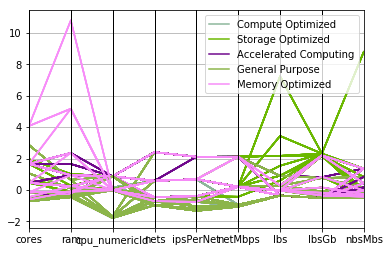

In [80]:
# Scaling attribute values to avoid few outiers
cols = ['cores', 'ram', 'cpu_numericId', 'nets', 'ipsPerNet', 'netMbps', 'lbs', 'lbsGb', 'nbsMbs']
subset_df = aws[cols]

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
final_df = pd.concat([scaled_df, aws['line']], axis=1)
final_df.head()

# plot parallel coordinates
from pandas.plotting import parallel_coordinates
pc = parallel_coordinates(final_df, 'line')

/usr/lib64/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


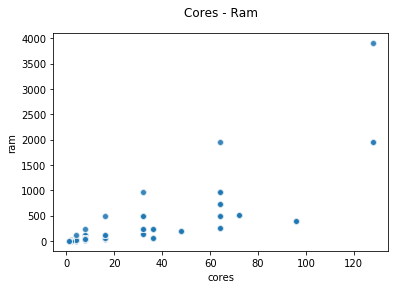

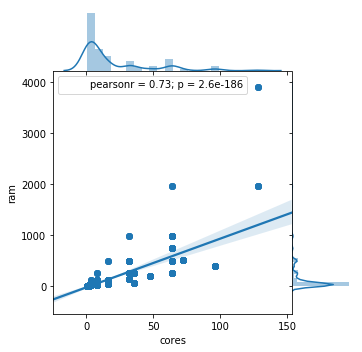

In [81]:
# Scatter Plot
plt.scatter(aws['cores'], aws['ram'],
            alpha=0.4, edgecolors='w')

plt.xlabel('cores')
plt.ylabel('ram')
plt.title('Cores - Ram',y=1.05)


# Joint Plot
jp = sns.jointplot(x='cores', y='ram', data=aws,
                   kind='reg', space=0, size=5, ratio=4)

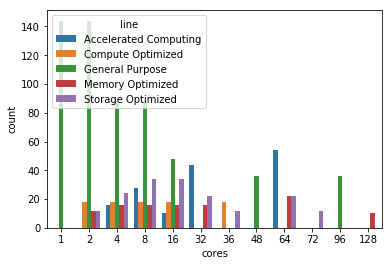

In [82]:
# Multi-bar Plot
cc = sns.countplot(x="cores", hue="line", data=aws)

Text(0,0.5,'cores')

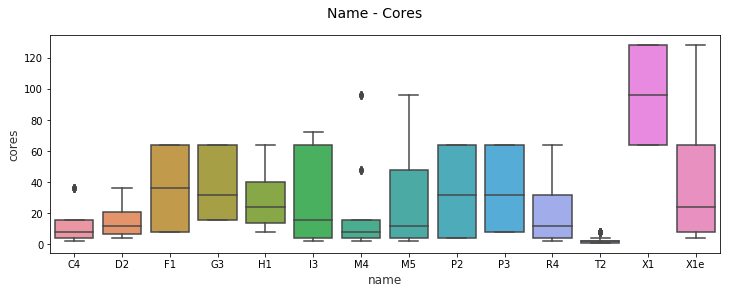

In [83]:
# Box Plots
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Name - Cores', fontsize=14)

sns.boxplot(x="name", y="cores", data=aws,  ax=ax)
ax.set_xlabel("name",size = 12,alpha=0.8)
ax.set_ylabel("cores",size = 12,alpha=0.8)

Text(0,0.5,'Cores')

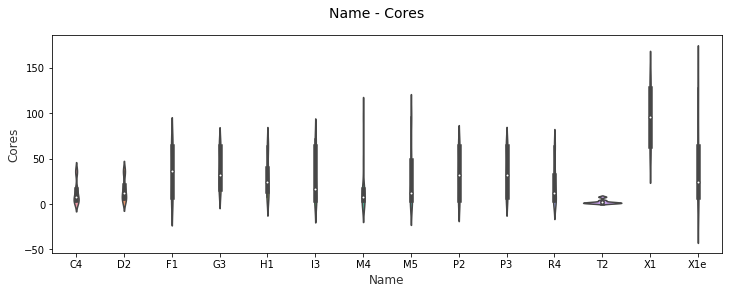

In [84]:
# Violin Plots
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Name - Cores', fontsize=14)

sns.violinplot(x="name", y="cores", data=aws,  ax=ax)
ax.set_xlabel("Name",size = 12,alpha=0.8)
ax.set_ylabel("Cores",size = 12,alpha=0.8)

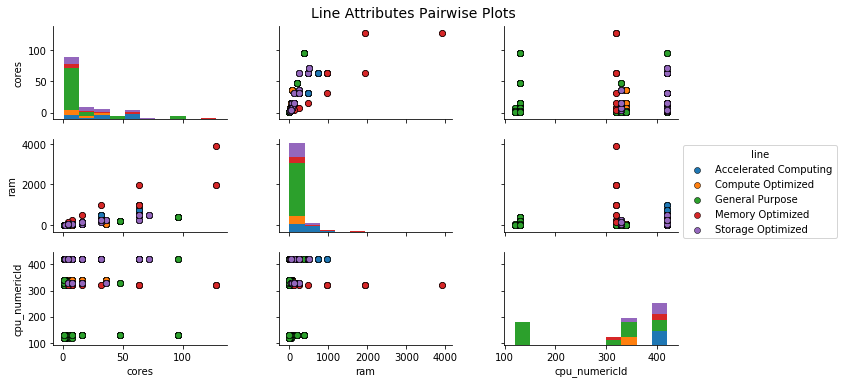

In [85]:
# Scatter Plot with Hue for visualizing data in 3-D
cols = ['cores', 'ram', 'cpu_numericId', 'line']
pp = sns.pairplot(aws[cols], hue='line', size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Line Attributes Pairwise Plots', fontsize=14)

Text(0.5,1.05,'Cores - Ram - CPU')

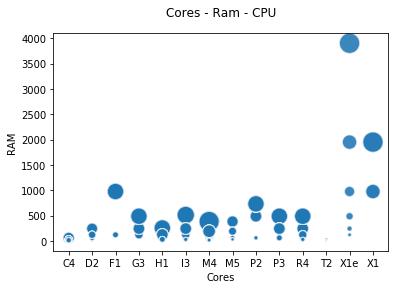

In [86]:
# Visualizing 3-D numeric data with a bubble chart
# length, breadth and size
plt.scatter(aws['name'], aws['ram'], s=(aws['cpu_numericId']*aws['cores']*aws['share'])/10000, 
            alpha=0.4, edgecolors='w')

plt.xlabel('Cores')
plt.ylabel('RAM')
plt.title('Cores - Ram - CPU',y=1.05)

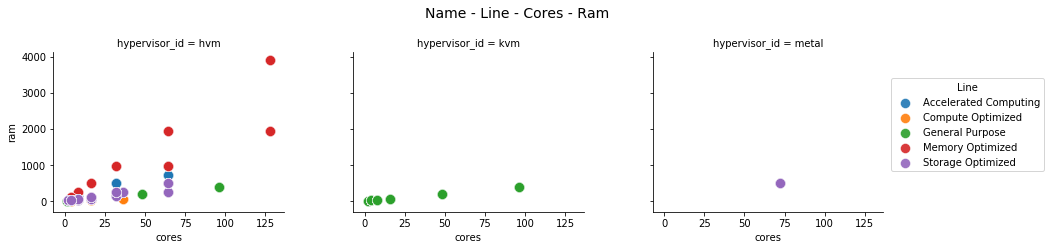

In [87]:
# Visualizing 4-D mix data using scatter plots
# leveraging the concepts of hue and facets for > 1 categorical attributes
g = sns.FacetGrid(aws, col="hypervisor_id", hue='line',
                  aspect=1.2, size=3.5)
g.map(plt.scatter, "cores", "ram", alpha=0.9, 
      edgecolor='white', linewidth=0.5, s=100)
fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Name - Line - Cores - Ram', fontsize=14)
l = g.add_legend(title='Line')

In [88]:
import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(aws)

ModuleNotFoundError: No module named 'hdbscan'